In [1]:
import pygrating as pg

## Loading UVIT grating image using `GratingImage`

- The dispersion axis should be along the x axis of the image.
- The file is assumed to be reduced using CCDLAB. If not, there could be errors while importing metadata.

In [2]:
file_name = 'data/HZ 4_FUV_Grating1.fits.gz'
image = pg.GratingImage(file_name)

HZ 4
	OBS_ID   = C03_013T01_9000001586
	DETECTOR = FUV
	FILTERID = Grating1
	RDCDTIME = 791.551 s


### Plotting the image

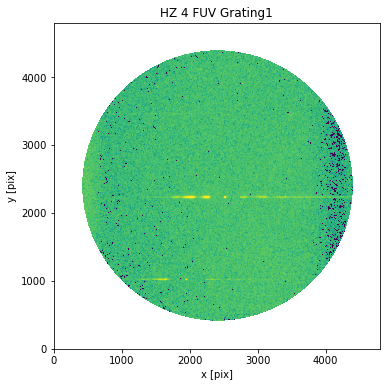

In [3]:
image.plot()

### Identifying sources
- Detects sources by averaging across dispersion axis
- Identifies peaks based on prominence

C:\Users\user\Documents\work\M67_grism_spectra\pygrating.py:130: RuntimeWarning: Mean of empty slice
  row_wise_counts   = np.log10(np.nanmean(self.data_smooth, axis=1))


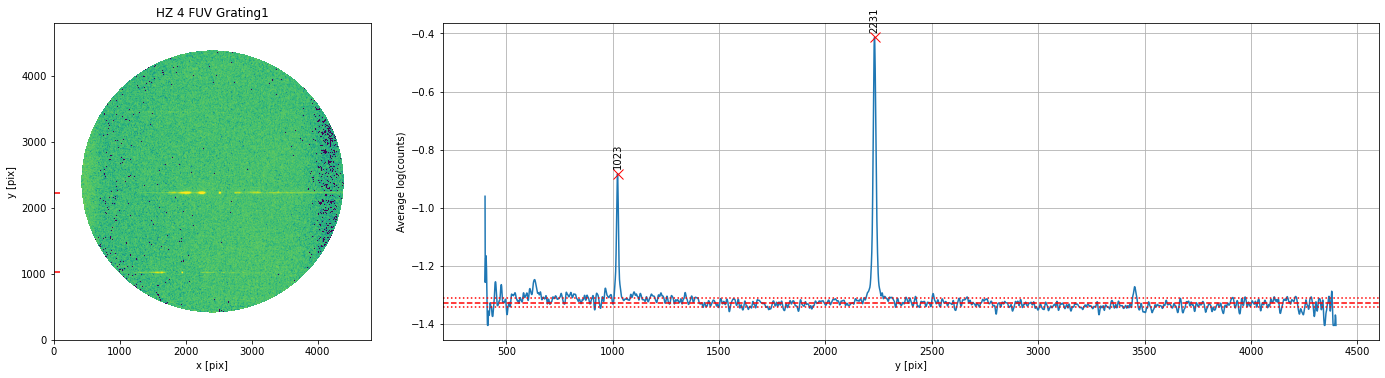

In [4]:
image.identify_sources(prominence=10)

## Spectra extraction using `GratingSpectrum`

- Minimum inputs are: 
    - image : Gratingimage
    - ypix : y value of the source [pix]
    - upix_bkg : y value of the background region [pix]
    
- Outputs
    - spectra of order -1 and -2 depending on the calibration status as follows:
        - FUV_Grating1 has order -1 and -2 
        - FUV_Grating2 has order -2
        - NUV_Grating has order -1

C:\Users\user\Documents\work\M67_grism_spectra\pygrating.py:193: RuntimeWarning: divide by zero encountered in power
  self.fractional_error_Poisson = self.spec_1d.value**-0.5


(<Figure size 1440x720 with 10 Axes>,
 array([<Axes:title={'center':'HZ 4  y=2231'}>, <Axes:>,
        <Axes:xlabel='pix', ylabel='ct / pix'>,
        <Axes:xlabel='Angstrom', ylabel='ct / (Angstrom s)'>,
        <Axes:xlabel='Angstrom', ylabel='erg / (Angstrom cm2 s)'>],
       dtype=object))

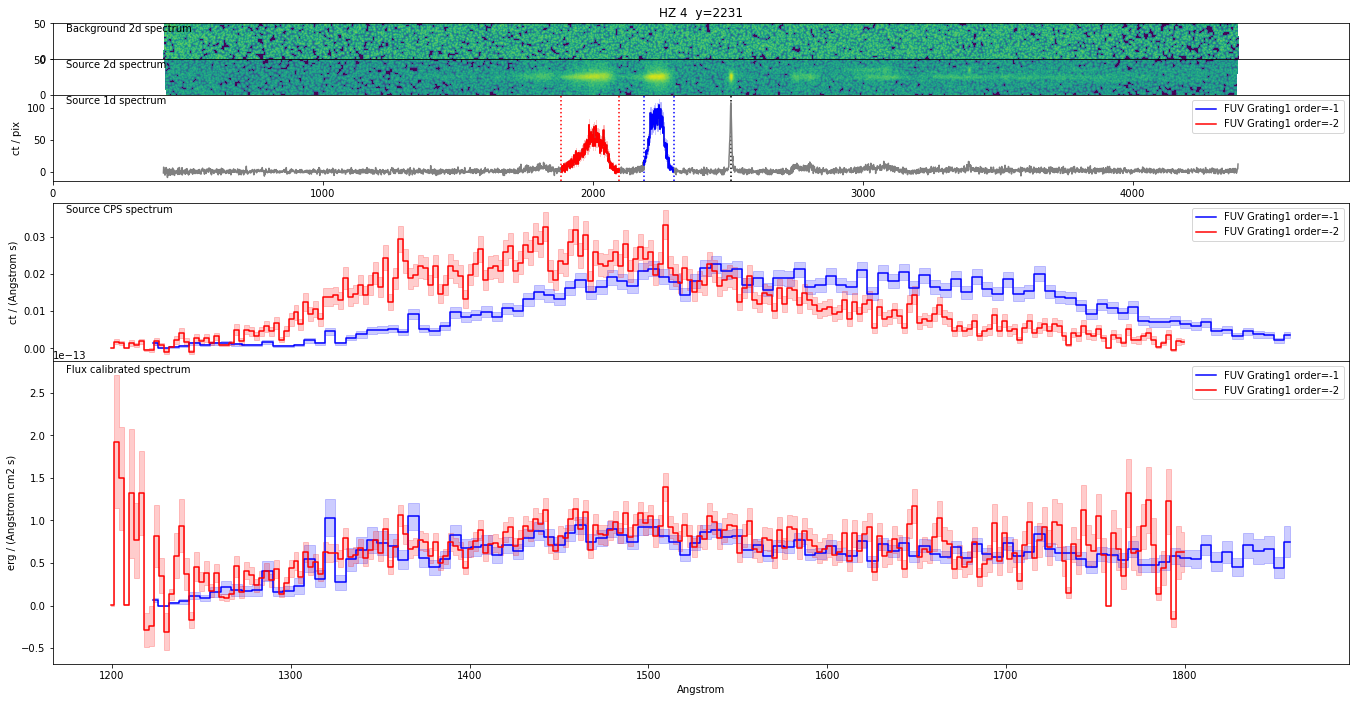

In [5]:
source = pg.GratingSpectrum(image, YPIX=image.ypix_list[1], YPIX_bkg=2500,    # necessary
                         xpix=None, cross_disp_buffer=25)                  # optional
source.plot_all()

### Plotting individual spectrum

<AxesSubplot:xlabel='Angstrom', ylabel='erg / (Angstrom cm2 s)'>

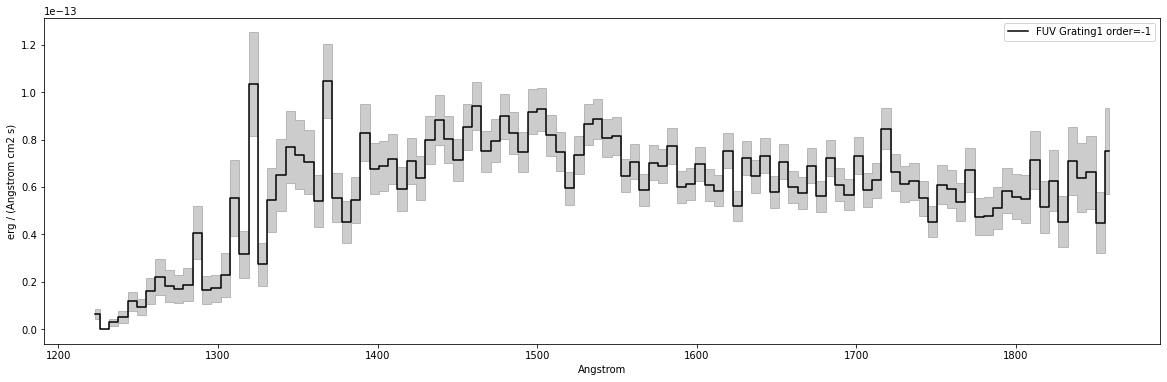

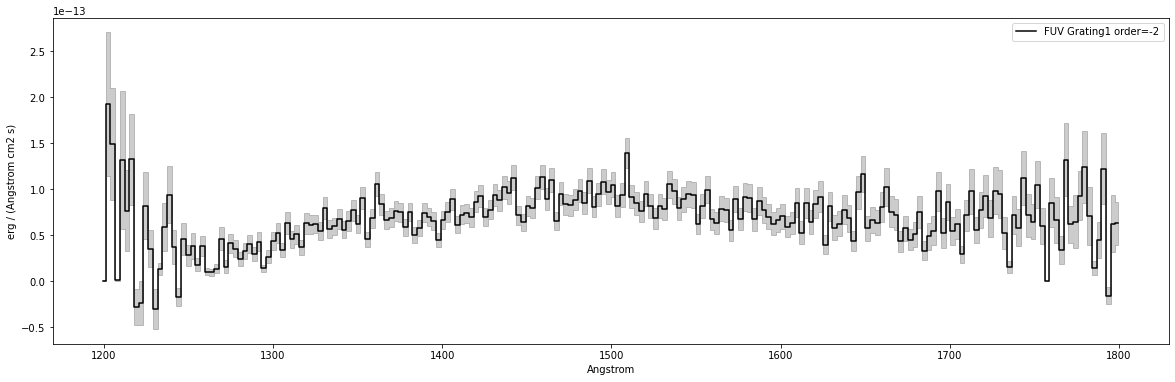

In [6]:
pg.plot_spectrum(source.spectrum_m1)
pg.plot_spectrum(source.spectrum_m2)

### Saving spectra and plots
- Spectra are saved as Astropy Qtables (which included units and errors)

In [7]:
source.save_all(folder_path='data/',overwrite=True)

Saved data/HZ 4_FUV_Grating1_2231_m1.fits
Saved data/HZ 4_FUV_Grating1_2231_m2.fits


### Loading and plotting saved spectrum

In [8]:
spectrum = pg.load_spectrum('data/HZ 4_FUV_Grating1_2231_m1.fits')
spectrum

<Spectrum1D(flux=<Quantity [7.52920285e-14, 4.47650444e-14, 6.60952076e-14, 6.38335013e-14,
           7.08446397e-14, 4.53738511e-14, 6.26937331e-14, 5.16301974e-14,
           7.12793807e-14, 5.48660419e-14, 5.58522583e-14, 5.83373997e-14,
           5.10037209e-14, 4.76337872e-14, 4.74115547e-14, 6.69570061e-14,
           5.35336725e-14, 5.90936319e-14, 6.09934350e-14, 4.53699202e-14,
           5.51127881e-14, 6.23635606e-14, 6.13769598e-14, 6.61372424e-14,
           8.45924968e-14, 6.28622358e-14, 5.87547638e-14, 7.31085763e-14,
           5.67447570e-14, 6.08421076e-14, 7.22689964e-14, 5.59752019e-14,
           6.90222415e-14, 5.73515790e-14, 6.00576024e-14, 7.06072492e-14,
           5.78250684e-14, 7.31619440e-14, 6.44783523e-14, 7.21997678e-14,
           5.19543734e-14, 7.53509048e-14, 5.83412350e-14, 6.08994593e-14,
           6.96560377e-14, 6.13480470e-14, 6.00374668e-14, 7.72269965e-14,
           6.89142397e-14, 7.01827178e-14, 5.86401555e-14, 7.06522924e-14,
        

<AxesSubplot:xlabel='Angstrom', ylabel='erg / (Angstrom cm2 s)'>

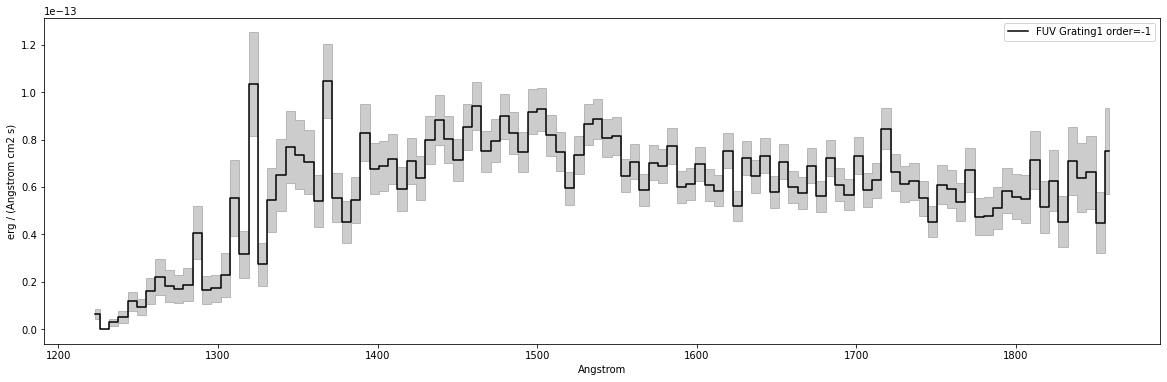

In [9]:
pg.plot_spectrum(spectrum)